In [1]:
import numpy as np
from mikefm_skill.model import ModelResult
from mikefm_skill.observation import PointObservation
from mikefm_skill.metrics import root_mean_squared_error as RMSE

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
fn = '../tests/testdata/TS.dfs0'
mr = ModelResult(fn, 'OresundHD')
print(mr)
print(mr.dfs)

<mikefm_skill.ModelResult>
../tests/testdata/TS.dfs0
<mikeio.Dfs0>
Timeaxis: TimeAxisType.EquidistantCalendar
Number of items: 12


In [4]:
fn = '../tests/testdata/smhi_2095_klagshamn.dfs0'
o1 = PointObservation(fn, x=0.36684415E+06, y=0.61542916E+07, item=0, name='Klagshamn') 
print(o1)
print(o1.n, o1.start_time)

PointObservation: Klagshamn, x=366844.15, y=6154291.6
50328 2015-01-01 01:00:00


In [5]:
mr.add_observation(o1, item='Klagshamn: Surface elevation')
mr.observations

[PointObservation: Klagshamn, x=366844.15, y=6154291.6]

In [6]:
mrc = mr.extract()

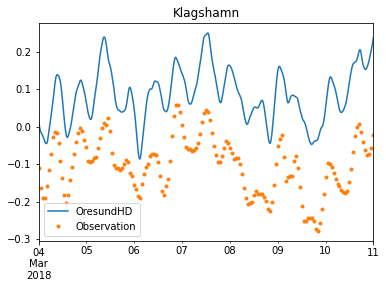

In [7]:
mrc[0].plot_timeseries()

In [8]:
mrc[0].skill(), RMSE(mrc[0].obs, mrc[0].mod, unbiased=True)

(0.19168248446362082, 0.04133637056808915)

In [9]:
df = mrc.skill_report()
df

,bias,corr_coef,rmse,scatter_index
Klagshamn,0.187172,0.8423,0.191682,0.325449
